<a href="https://colab.research.google.com/github/SujithaNamburu/123/blob/main/Math_project_House_Price_Prediction_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 1

# House Price Prediction

### Importing Required Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer,make_column_selector

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.exceptions import NotFittedError

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

sns.set_style('darkgrid')

%matplotlib inline

### Reading Data

In [ ]:
df = pd.read_csv('train.csv')

df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [ ]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [ ]:
df.isna().sum()

,0
POSTED_BY,0
UNDER_CONSTRUCTION,0
RERA,0
BHK_NO.,0
BHK_OR_RK,0
SQUARE_FT,0
READY_TO_MOVE,0
RESALE,0
ADDRESS,0
LONGITUDE,0


In [ ]:
df.duplicated().sum()

np.int64(401)

In [ ]:
df = df.drop_duplicates()

In [ ]:
data = df.copy()

In [ ]:
data["ADDRESS"]= data["ADDRESS"].str.split(",").str[-1]
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,Bangalore,12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,Mysore,12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,Bangalore,12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,Ghaziabad,28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,Kolkata,22.592200,88.484911,60.5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29050 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29050 non-null  object 
 1   UNDER_CONSTRUCTION     29050 non-null  int64  
 2   RERA                   29050 non-null  int64  
 3   BHK_NO.                29050 non-null  int64  
 4   BHK_OR_RK              29050 non-null  object 
 5   SQUARE_FT              29050 non-null  float64
 6   READY_TO_MOVE          29050 non-null  int64  
 7   RESALE                 29050 non-null  int64  
 8   ADDRESS                29050 non-null  object 
 9   LONGITUDE              29050 non-null  float64
 10  LATITUDE               29050 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29050 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.9+ MB


Based on clasification of the cities of india found on https://en.wikipedia.org/wiki/Classification_of_Indian_cities. The idea is to clasify the cities using a map to help our model perform better

In [ ]:
def map_city(city):
    if city in ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune']:
        return 'tier1'
    elif city in ['Agra', 'Ajmer', 'Aligarh', 'Amravati', 'Amritsar', 'Asansol', 'Aurangabad', 'Bareilly',
                  'Belgaum', 'Bhavnagar', 'Bhiwandi', 'Bhopal', 'Bhubaneswar', 'Bikaner', 'Bilaspur', 'Bokaro Steel City',
                  'Chandigarh', 'Coimbatore', 'Cuttack', 'Dehradun', 'Dhanbad', 'Bhilai', 'Durgapur', 'Dindigul', 'Erode',
                  'Faridabad', 'Firozabad', 'Ghaziabad', 'Gorakhpur', 'Gulbarga', 'Guntur', 'Gwalior', 'Gurgaon', 'Guwahati',
                  'Hamirpur', 'Hubli–Dharwad', 'Indore', 'Jabalpur', 'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur',
                  'Jhansi', 'Jodhpur', 'Kakinada', 'Kannur', 'Kanpur', 'Karnal', 'Kochi', 'Kolhapur', 'Kollam', 'Kozhikode',
                  'Kurnool', 'Ludhiana', 'Lucknow', 'Madurai', 'Malappuram', 'Mathura', 'Mangalore', 'Meerut', 'Moradabad',
                  'Mysore', 'Nagpur', 'Nanded', 'Nashik', 'Nellore', 'Noida', 'Patna', 'Pondicherry', 'Purulia', 'Prayagraj',
                  'Raipur', 'Rajkot', 'Rajahmundry', 'Ranchi', 'Rourkela', 'Ratlam', 'Salem', 'Sangli', 'Shimla', 'Siliguri',
                  'Solapur', 'Srinagar', 'Surat', 'Thanjavur', 'Thiruvananthapuram', 'Thrissur', 'Tiruchirappalli', 'Tirunelveli',
                  'Tiruvannamalai', 'Ujjain', 'Bijapur', 'Vadodara', 'Varanasi', 'Vasai-Virar City', 'Vijayawada', 'Visakhapatnam',
                  'Vellore', 'Warangal']:
        return 'tier2'
    else:
        return 'tier3'

data['city_tier'] = data['ADDRESS'].apply(map_city)

In [ ]:
data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city_tier
0,Owner,0,0,2,BHK,1300.236407,1,1,Bangalore,12.969910,77.597960,55.0,tier1
1,Dealer,0,0,2,BHK,1275.000000,1,1,Mysore,12.274538,76.644605,51.0,tier2
2,Owner,0,0,2,BHK,933.159722,1,1,Bangalore,12.778033,77.632191,43.0,tier1
3,Owner,0,1,2,BHK,929.921143,1,1,Ghaziabad,28.642300,77.344500,62.5,tier2
4,Dealer,1,0,2,BHK,999.009247,0,1,Kolkata,22.592200,88.484911,60.5,tier1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,Agra,27.140626,78.043277,45.0,tier2
29447,Owner,0,0,2,BHK,769.230769,1,1,Vapi,39.945409,-86.150721,16.0,tier3
29448,Dealer,0,0,2,BHK,1022.641509,1,1,Jaipur,26.928785,75.828002,27.1,tier2
29449,Owner,0,0,2,BHK,927.079009,1,1,Chennai,12.900150,80.227910,67.0,tier1


### EDA

BHK_OR_RK
BHK    29026
RK        24
Name: count, dtype: int64


<BarContainer object of 2 artists>

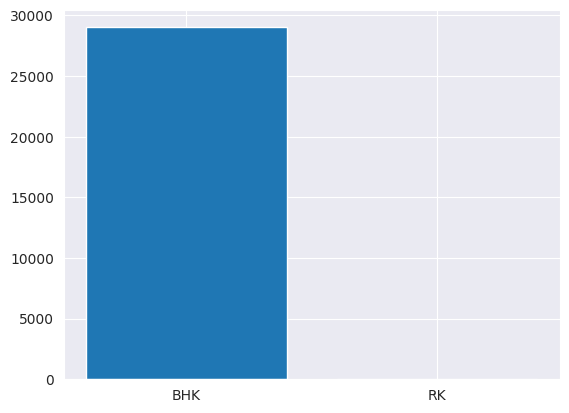

In [ ]:
print(data["BHK_OR_RK"].value_counts())
plt.bar(["BHK","RK"],data["BHK_OR_RK"].value_counts())

its clearly that almost all the houses are BHK so it makes sens to drop that column.Also we don't need the ADDRESS column anymore because we created a city tier If we have a look at POSTED BY it's clear that it will have no predictive power to help our model so we will just drop it

In [ ]:
data.drop(['POSTED_BY',"BHK_OR_RK","ADDRESS"], axis=1, inplace = True)
data

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city_tier
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,tier1
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,tier2
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,tier1
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,tier2
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,tier1
...,...,...,...,...,...,...,...,...,...,...
29446,0,0,3,2500.000000,1,1,27.140626,78.043277,45.0,tier2
29447,0,0,2,769.230769,1,1,39.945409,-86.150721,16.0,tier3
29448,0,0,2,1022.641509,1,1,26.928785,75.828002,27.1,tier2
29449,0,0,2,927.079009,1,1,12.900150,80.227910,67.0,tier1


Now we are intrested to plot a mapbox to look at the distribution of data regards to locations in india for that we will limit the LONGITUDE and LATITUDE for india

In [ ]:
data=data[data["LONGITUDE"].between(65,96) & data["LATITUDE"].between(7,36)]
data

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city_tier


### Visualization Map of House Location Disrtibution

In [ ]:

fig = px.density_mapbox(data,  lon = 'LONGITUDE',lat = 'LATITUDE',
                        radius = 8,
                        zoom = 6,
                        mapbox_style = 'open-street-map')
fig.show()

### Checking Outliers

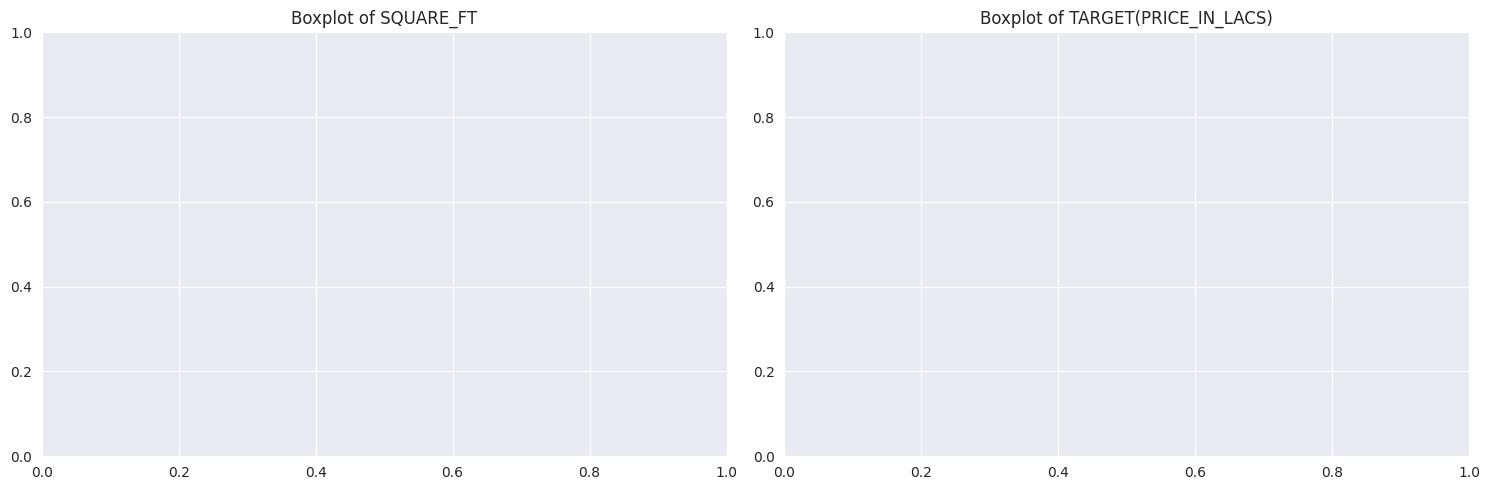

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting boxplots for 'SQUARE_FT' and 'TARGET(PRICE_IN_LACS)'
plt.figure(figsize=(15, 5))

# Plot for SQUARE_FT
plt.subplot(1, 2, 1)
sns.boxplot(data['SQUARE_FT'])
plt.title('Boxplot of SQUARE_FT')

# Plot for TARGET(PRICE_IN_LACS)
plt.subplot(1, 2, 2)
sns.boxplot(data['TARGET(PRICE_IN_LACS)'])
plt.title('Boxplot of TARGET(PRICE_IN_LACS)')

plt.tight_layout()
plt.show()


Outliers:

* SQUARE_FT: The boxplot and summary statistics indicate the presence of extreme outliers. For example, the maximum value is approximately 254.5 million square feet, which is highly unrealistic for individual property listings.

* TARGET(PRICE_IN_LACS): Similarly, this variable also exhibits outliers, with prices as high as 30,000 lakhs (or 300 Crores), which is atypical for standard property listings.

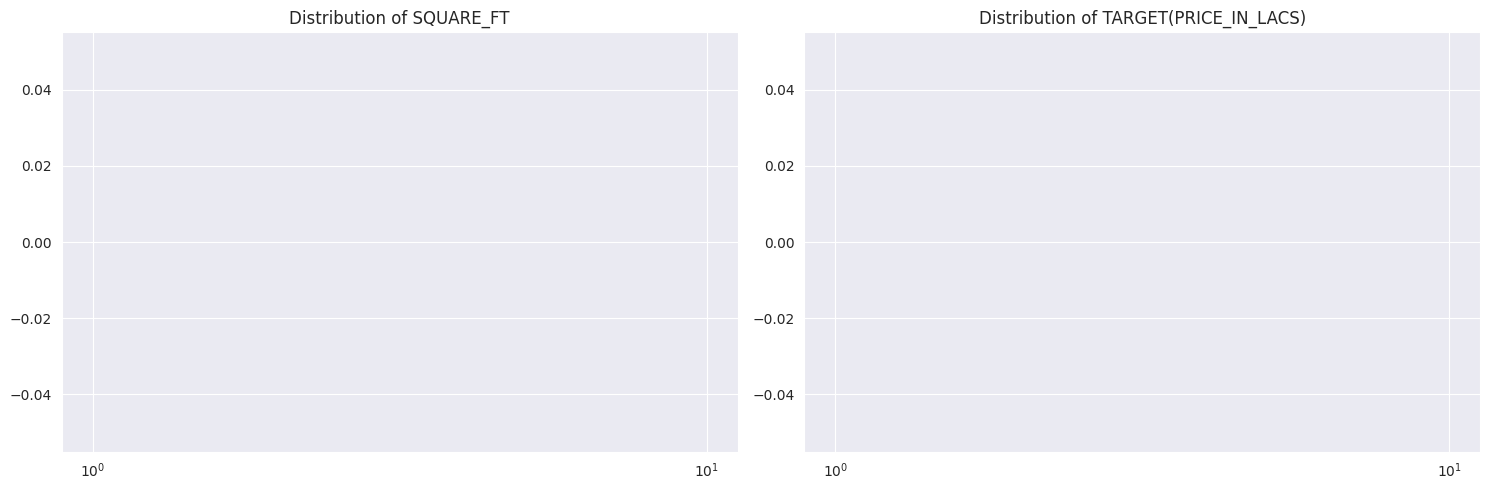

In [ ]:
# Plotting the distribution of 'SQUARE_FT' and 'TARGET(PRICE_IN_LACS)'
plt.figure(figsize=(15, 5))

# Distribution of SQUARE_FT
plt.subplot(1, 2, 1)
sns.histplot(data['SQUARE_FT'], bins=50, kde=True)
plt.title('Distribution of SQUARE_FT')
plt.xscale('log') # Applying logarithmic scale due to wide range of values

# Distribution of TARGET(PRICE_IN_LACS)
plt.subplot(1, 2, 2)
sns.histplot(data['TARGET(PRICE_IN_LACS)'], bins=50, kde=True)
plt.title('Distribution of TARGET(PRICE_IN_LACS)')
plt.xscale('log') # Applying logarithmic scale for similar reasons

plt.tight_layout()
plt.show()


The distributions of both SQUARE_FT and TARGET(PRICE_IN_LACS) are highly right-skewed, as indicated by the long tails in the histograms. This skewness is typical in real estate data, where a few high-value properties can significantly differ from the majority.

Given this skewness, a log transformation seems appropriate for both variables. This transformation will help in stabilizing the variance and making the data more normally distributed, which is beneficial for many statistical analyses and models.

### Removing Outliers

In [ ]:
# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtering the data
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# Removing outliers from BHK_NO.
data = remove_outliers(data, 'BHK_NO.')

# Removing outliers from TARGET(PRICE_IN_LACS)
data = remove_outliers(data, 'TARGET(PRICE_IN_LACS)')


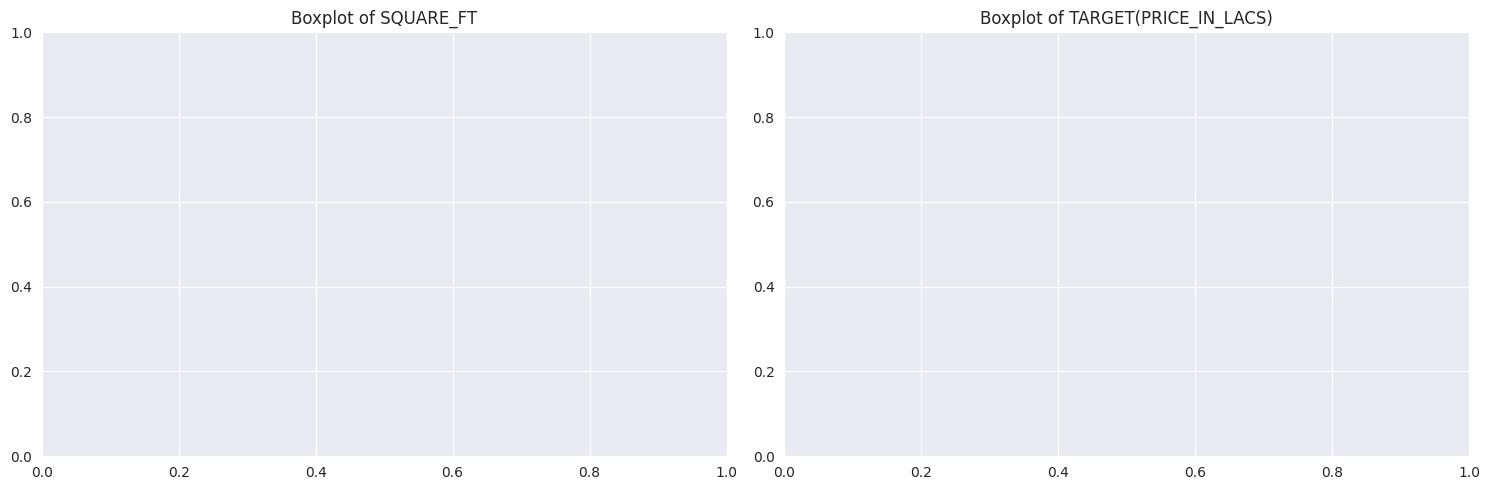

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting boxplots for 'SQUARE_FT' and 'TARGET(PRICE_IN_LACS)'
plt.figure(figsize=(15, 5))

# Plot for SQUARE_FT
plt.subplot(1, 2, 1)
sns.boxplot(data['SQUARE_FT'])
plt.title('Boxplot of SQUARE_FT')

# Plot for TARGET(PRICE_IN_LACS)
plt.subplot(1, 2, 2)
sns.boxplot(data['TARGET(PRICE_IN_LACS)'],color="lightgreen")
plt.title('Boxplot of TARGET(PRICE_IN_LACS)')

plt.tight_layout()
plt.show()


### Applying Log Transformation

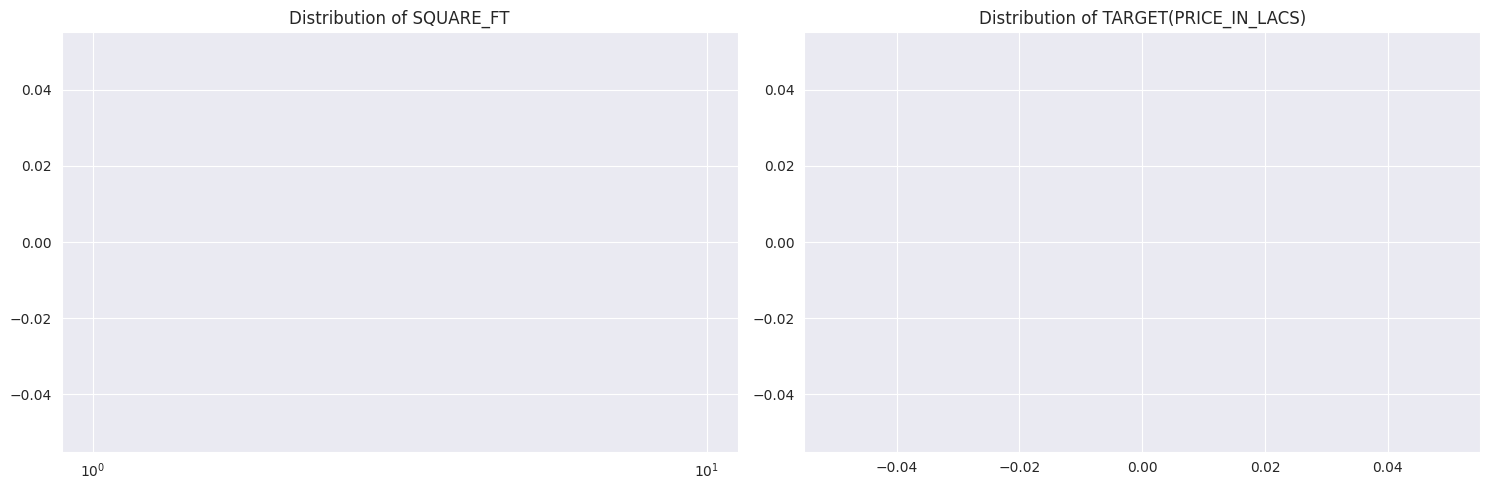

In [ ]:
# Plotting the distribution of 'SQUARE_FT' and 'TARGET(PRICE_IN_LACS)'
plt.figure(figsize=(15, 5))

# Distribution of SQUARE_FT
plt.subplot(1, 2, 1)
sns.histplot(data['SQUARE_FT'], bins=50, kde=True)
plt.title('Distribution of SQUARE_FT')
plt.xscale('log')


# Distribution of TARGET(PRICE_IN_LACS)
plt.subplot(1, 2, 2)
sns.histplot(data['TARGET(PRICE_IN_LACS)'], bins=50, kde=True)
plt.title('Distribution of TARGET(PRICE_IN_LACS)')


plt.tight_layout()
plt.show()


In [ ]:
# Creating log-transformed columns for 'SQUARE_FT' and 'TARGET(PRICE_IN_LACS)'
# Adding a small value to handle zero values
log_data = data.copy()
log_data['SQUARE_FT'] = np.log(data['SQUARE_FT'] + 1)
log_data['TARGET(PRICE_IN_LACS)'] = np.log(data['TARGET(PRICE_IN_LACS)'] + 1)

# Summary statistics for key variables including the new log-transformed columns
summary_statistics = log_data[['SQUARE_FT', 'TARGET(PRICE_IN_LACS)',
                           'BHK_NO.', 'UNDER_CONSTRUCTION', 'READY_TO_MOVE', 'RESALE']].describe()

summary_statistics

,SQUARE_FT,TARGET(PRICE_IN_LACS),BHK_NO.,UNDER_CONSTRUCTION,READY_TO_MOVE,RESALE
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


Apply a log transformation to SQUARE_FT and TARGET(PRICE_IN_LACS).
Handle any zero or negative values (if present) before applying the transformation, as the logarithm of zero or negative numbers is undefined.

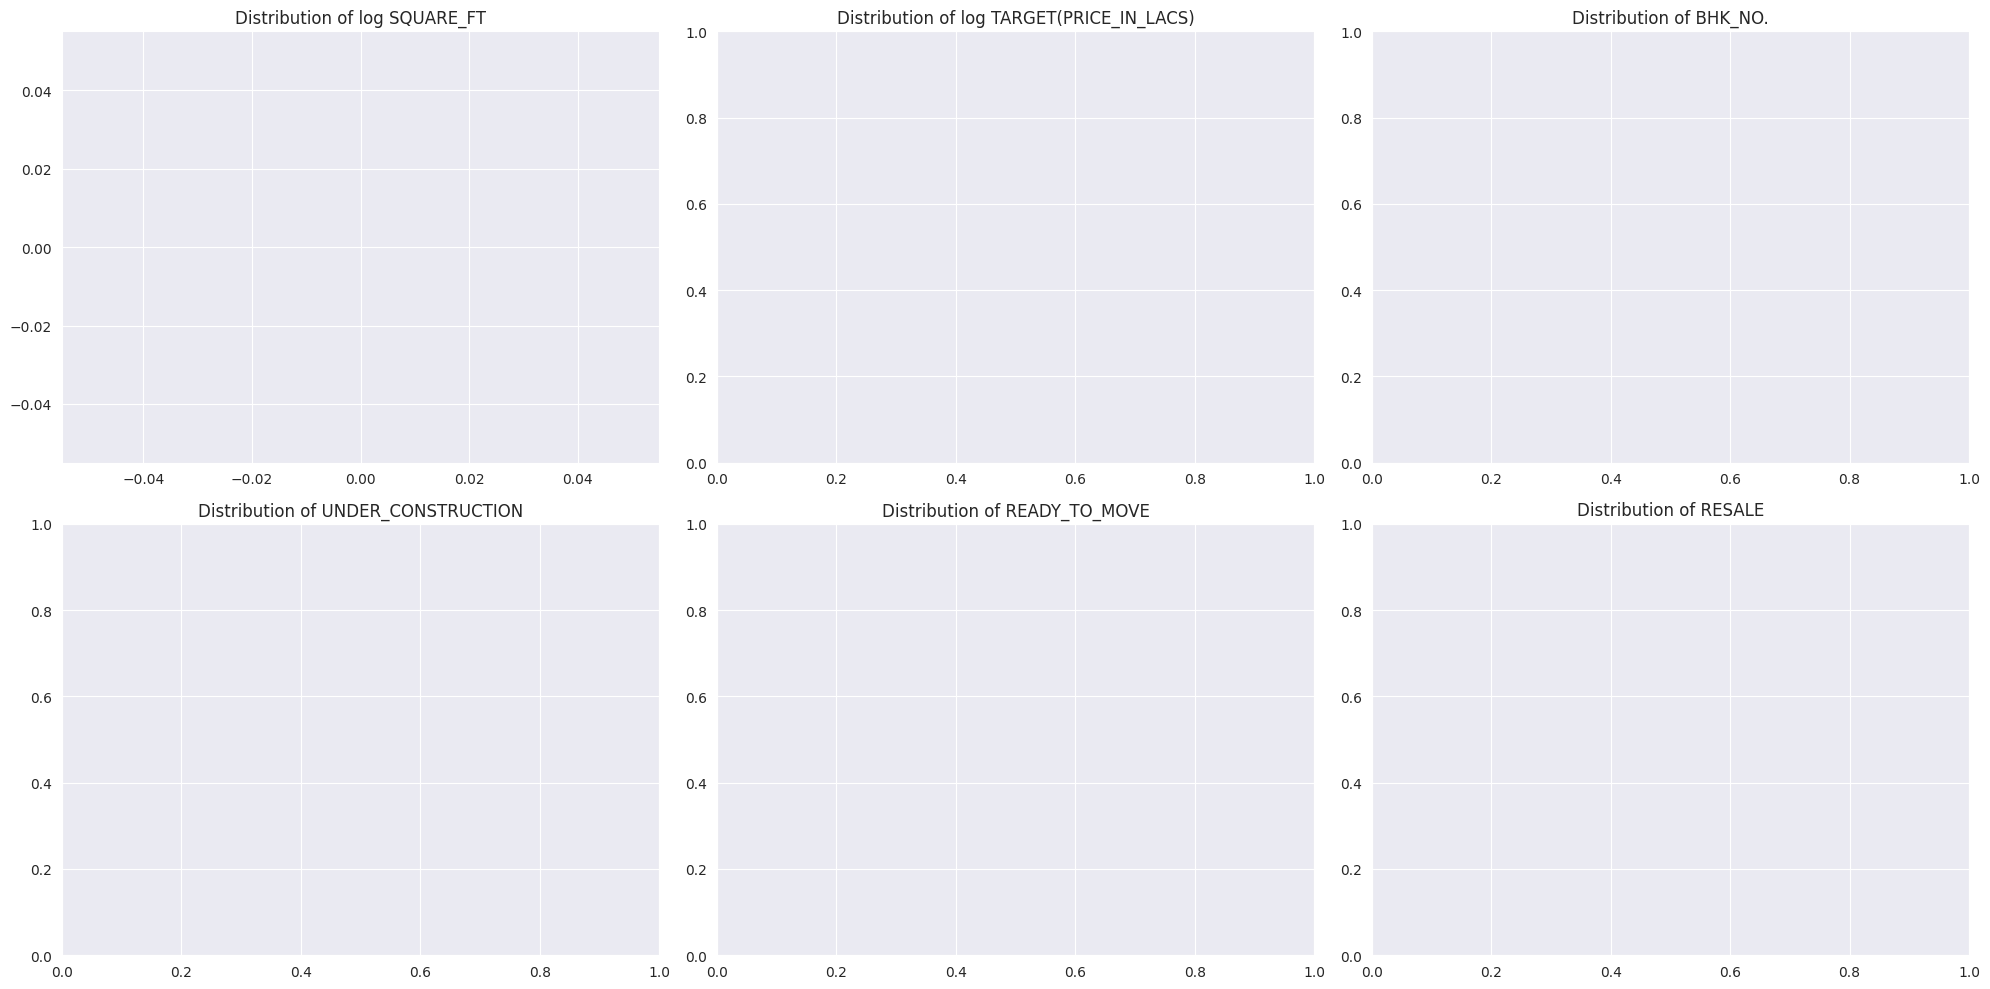

In [ ]:
# Visualizing the distribution of key variables after log-transformation
plt.figure(figsize=(20, 10))

# Histogram for SQUARE_FT
plt.subplot(2, 3, 1)
sns.histplot(log_data['SQUARE_FT'], bins=30, kde=True)
plt.title('Distribution of log SQUARE_FT')

# Histogram for TARGET(PRICE_IN_LACS)
plt.subplot(2, 3, 2)
sns.histplot(log_data['TARGET(PRICE_IN_LACS)'], bins=30, kde=True, color="green")
plt.title('Distribution of log TARGET(PRICE_IN_LACS)')

# Histogram for BHK_NO.
plt.subplot(2, 3, 3)
sns.countplot(x='BHK_NO.', data=log_data, palette="Paired")
plt.title('Distribution of BHK_NO.')

# Histogram for UNDER_CONSTRUCTION
plt.subplot(2, 3, 4)
sns.countplot(x='UNDER_CONSTRUCTION', data=log_data, palette="Set2")
plt.title('Distribution of UNDER_CONSTRUCTION')

# Histogram for READY_TO_MOVE
plt.subplot(2, 3, 5)
sns.countplot(x='READY_TO_MOVE', data=log_data, palette="husl")
plt.title('Distribution of READY_TO_MOVE')

# Histogram for RESALE
plt.subplot(2, 3, 6)
sns.countplot(x='RESALE', data=log_data)
plt.title('Distribution of RESALE')

plt.tight_layout()
plt.show()


### Heatmap

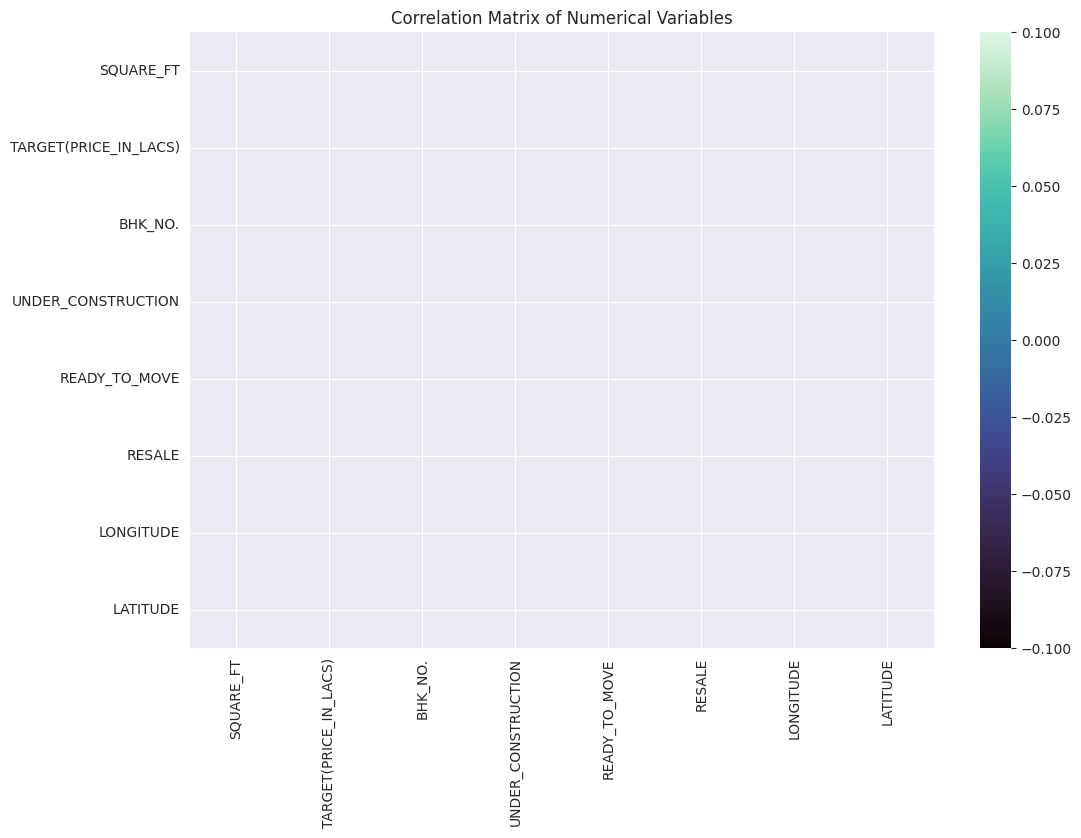

In [ ]:
# Correlation matrix for the numerical variables
correlation_matrix = log_data[['SQUARE_FT', 'TARGET(PRICE_IN_LACS)',
                           'BHK_NO.', 'UNDER_CONSTRUCTION', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE', 'LATITUDE']].corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='mako', fmt='.2f')


plt.title('Correlation Matrix of Numerical Variables')
plt.show()


**Correlation Matrix Analysis**
* **SQUARE_FT and TARGET(PRICE_IN_LACS):** There's a noticeable correlation between the size of the property (SQUARE_FT) and its price (TARGET(PRICE_IN_LACS)).

* **BHK_NO. and SQUARE_FT:** As expected, there's a positive correlation between the number of bedrooms (BHK_NO.) and the size of the property (SQUARE_FT). More bedrooms typically imply a larger property.

* **UNDER_CONSTRUCTION and READY_TO_MOVE**: These variables are negatively correlated, which is intuitive as they represent opposite statuses of a property.

* **RESALE:** The correlation of RESALE with other variables is relatively low, suggesting it might not be a strong predictor of property price on its own.

In [ ]:
#encoding city_tier feature
encoder = LabelEncoder()
log_data["city_tier"]= encoder.fit_transform(log_data["city_tier"]) #tier2 =1, tier1 = 0, tier3 =2

In [ ]:
log_data['city_tier'].value_counts()

,count
city_tier,


In [ ]:
log_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UNDER_CONSTRUCTION     0 non-null      int64  
 1   RERA                   0 non-null      int64  
 2   BHK_NO.                0 non-null      int64  
 3   SQUARE_FT              0 non-null      float64
 4   READY_TO_MOVE          0 non-null      int64  
 5   RESALE                 0 non-null      int64  
 6   LONGITUDE              0 non-null      float64
 7   LATITUDE               0 non-null      float64
 8   TARGET(PRICE_IN_LACS)  0 non-null      float64
 9   city_tier              0 non-null      float64
dtypes: float64(5), int64(5)
memory usage: 0.0 bytes


### Model Building



### Hypothesis 1: Impact of Property Features on House Prices

This hypothesis tested whether property features like `SQUARE_FT`, `BHK_NO.`, `UNDER_CONSTRUCTION`, `READY_TO_MOVE`, and `RESALE` significantly affect house prices.

#### Findings:
- **UNDER_CONSTRUCTION, RERA, BHK_NO., SQUARE_FT, READY_TO_MOVE**: All these variables have coefficients with p-values significantly less than 0.05, implying that they have a statistically significant impact on the house prices. Their coefficients are positive (except for `RESALE`), indicating that an increase in these variables is associated with an increase in house prices.
- **RESALE**: The coefficient is small and has a p-value greater than the typical alpha level of 0.05, suggesting that its effect on house prices is not statistically significant in this model.

#### Conclusion for Hypothesis 1:
The findings support the hypothesis that specific property features (size, number of bedrooms, construction status) significantly affect house prices. The exception is the `RESALE` status, which does not appear to have a significant impact.

### Hypothesis 2: Effect of Location on Price Valuation

This hypothesis tested the impact of location-based attributes on property valuation, specifically using `LATITUDE` and `LONGITUDE`.

#### Findings:
- **LATITUDE and LONGITUDE**: Both have statistically significant coefficients with very small p-values, indicating that these location-based attributes significantly impact property prices. The negative coefficients suggest that as the values of latitude and longitude increase, the property prices tend to decrease, which could be indicative of geographic pricing trends specific to the region being analyzed.

#### Conclusion for Hypothesis 2:
The results validate the hypothesis that location-based attributes (latitude and longitude) significantly affect property valuation. The direction and magnitude of this effect would depend on the specific geographic and economic context of the areas included in the dataset.



**Hypothesis Test:** There are identifiable regional patterns or trends that consistently impact house pricing, such as differences in price trends between urban and rural areas or among different cities.

In [ ]:
# Grouping data by city_tier
grouped_data = data.groupby('city_tier')['TARGET(PRICE_IN_LACS)']


In [ ]:
# Calculating mean, median, and standard deviation for each city_tier
stats = grouped_data.agg(['mean', 'median', 'std'])
print(stats)


In [ ]:
import scipy.stats as stats

# Preparing a list of prices for each region
prices_by_region = [group['TARGET(PRICE_IN_LACS)'].values for name, group in data.groupby('city_tier')]

# Performing ANOVA
anova_result = stats.f_oneway(*prices_by_region)
print('ANOVA Result:', anova_result)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Preparing the dataset for linear regression
# Using log-transformed 'TARGET(PRICE_IN_LACS)' as the dependent variable for better linearity
X = log_data.drop(["TARGET(PRICE_IN_LACS)"],axis=1)
y = log_data['TARGET(PRICE_IN_LACS)']

# Adding a constant to the model (for the intercept)
X = sm.add_constant(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting the model
model = sm.OLS(y_train, X_train).fit()

# Getting the summary of the regression
model_summary = model.summary()
model_summary


ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

Given the very small p-value (far less than any standard significance level like 0.05, 0.01, or even 0.001), we can reject the null hypothesis of the one-way ANOVA. The null hypothesis in one-way ANOVA states that all group means are equal,i.e that the average house prices are the same across different regions.

The rejection of this null hypothesis suggests that there is a statistically significant difference in the average house prices among the different regions in  dataset. In other words, the region where a property is located has a significant impact on its price.

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns


plt.figure(figsize=(12, 8))
#'model' is the fitted OLS model

# Residuals
residuals = model.resid

# Predicted values
fitted = model.fittedvalues

# 1. Linearity and Homoscedasticity Check
plt.scatter(fitted, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# 2. Independence Check
# Durbin-Watson statistic is included in model summary




In [ ]:
# 3. Normality of Residuals
sm.qqplot(residuals, line ='45')
plt.title('Normal Q-Q Plot')
plt.show()

### Performing Scaling

In [ ]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

### Model Building

In [ ]:
def print_model_locations(model_list):
    print("-"*80)
    for i,model in enumerate(model_list):
        print(model)
        print(f"{model.__class__.__name__:50} at index {i}")
        print("-"*80)

In [ ]:

def model_fitter(model_list):
    print("-"*80)
    for reg in model_list:
        reg_name=reg.__class__.__name__
        reg.fit(X_train,y_train.values.ravel())
        print(f"Fitting {reg_name} done")
        print("-"*80)

In [ ]:
from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

from xgboost import XGBRegressor

from lightgbm import LGBMRegressor

In [ ]:
reg_list=[
    DecisionTreeRegressor(),
    LinearRegression(n_jobs=-1),
    RandomForestRegressor(n_estimators=200,n_jobs=-1),
    AdaBoostRegressor(n_estimators=200,learning_rate=0.1),
    XGBRegressor(n_estimators=200,learning_rate=0.1,n_jobs=-1),
    LGBMRegressor(n_estimators=200,learning_rate=0.1,n_jobs=-1),
    GradientBoostingRegressor(n_estimators=200,learning_rate=0.1),
]

In [ ]:
print_model_locations(reg_list)

In [ ]:
%%time
model_fitter(reg_list)

### Evaluation

In [ ]:
def tester_func(model_list):
    for i,reg in enumerate(model_list):

        reg_name = reg.__class__.__name__
        pred=None

        try:
            pred=reg.predict(X_test)
        except NotFittedError as e:
            raise(e)

        print("-"*80)
        print(f"Predicitng {reg_name:40} done")

        score_dict[reg_name]={
            "R2 Score":r2_score(y_test,pred),
            "Root Mean Squared Error": mean_squared_error(y_test,pred, squared=False),
            "Mean Absolute Error Score":mean_absolute_error(y_test,pred),
            "Mean Squared Error Score":mean_squared_error(y_test,pred),
            'model_index':int(i)
        }
        j=i

    print("-"*80)

    return j

In [ ]:
score_dict={};j=0

In [ ]:
j_copy=tester_func(reg_list)

In [ ]:
j_copy

In [ ]:
score_pd=pd.DataFrame(score_dict).transpose().sort_values('Root Mean Squared Error')
score_pd

**Model Performance:**

* The LGBMRegressor and XGBRegressor perform the best across almost all metrics, indicating they are both accurate and consistent in their predictions.
* The RandomForestRegressor, while having a slightly higher RMSE and MSE, has the lowest MAE, which could make it preferable in certain situations where average error is more important than the variability of the error.
* GradientBoostingRegressor, DecisionTreeRegressor, AdaBoostRegressor, and LinearRegression show progressively lower performance across all metrics.
* The LinearRegression model has the lowest R2 score, highest RMSE, and highest MSE, indicating it is the least accurate model for this dataset.

In [ ]:
fig,ax=plt.subplots(3,1,figsize=(18,12))
sns.lineplot(data=score_pd.iloc[:,[1,2]],markers=True,ax=ax[1], palette="Set2")
sns.lineplot(data=score_pd.iloc[:,[0]],markers=True,ax=ax[0])
sns.lineplot(data=score_pd.iloc[:,[3]],markers=True,ax=ax[2],palette="magma")
plt.tight_layout()
plt.show()

### XGB Residual Plot

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt


# Fit the model
model = xgb.XGBRegressor(objective ='reg:squarederror')
model.fit(X_train, y_train)


# Predict responses
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Plotting the residuals
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, train_residuals, color='lightblue', label='Train Data')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Training Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, test_residuals, color='lightgreen', label='Test Data')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Test Data')
plt.legend()

plt.show()


### XGB Normality

In [ ]:
# Q-Q plot
plt.figure(figsize=(15, 10))
stats.probplot(test_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [ ]:
import lightgbm as lgb

# Create an LGBM regressor object
lgbm_model = lgb.LGBMRegressor(
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=100
)

# Train the model on the training data
lgbm_model.fit(X_train, y_train)


# Predict using the LGBM model
y_pred = lgbm_model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plotting the residuals
plt.figure(figsize=(10, 5))

# Residuals plot
plt.subplot(1, 2, 1)
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

# Normality plot
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot')

plt.tight_layout()
plt.show()

**Conclusion:**

The ensemble models (LGBM, XGB, and RandomForest) outperform the single estimators (DecisionTree, AdaBoost, and Linear Regression) in predicting housing prices. The choice of the best model might depend on the specific use case. For example, if interpretability is important, the slightly less accurate but more interpretable models might be chosen. On the other hand, for pure prediction accuracy, LGBM and XGB are the best performers.